In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('C://Users//giriv//Churn Prediction//Churn data.csv')

In [61]:
data.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [62]:
 data.shape

(7043, 21)

In [63]:
data.drop("customerID", axis=1, inplace=True)

CHECKING FOR MISSING VALUES

In [64]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [65]:
data['TotalCharges'] = data['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])
print(data['TotalCharges'].dtype)

float64


In [66]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [67]:
# Let's see if there is class imbalance in the target variable
print (data['Churn'].value_counts(ascending=True))

Yes    1869
No     5174
Name: Churn, dtype: int64


DATA VISUALIZATION

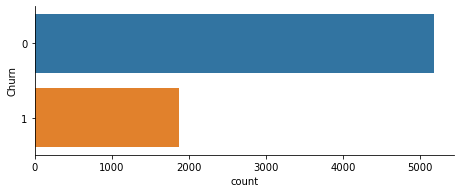

In [99]:
ax = sns.catplot(y='Churn', kind='count', data=data, height=2.6, aspect=2.5)

In [68]:
def bar_plot(variable):
    # get feature
    var = data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [69]:
categorical = (data.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)


Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


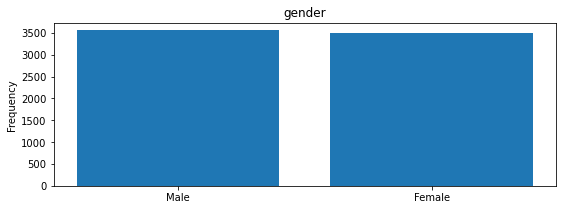

gender:
Male      3555
Female    3488
Name: gender, dtype: int64


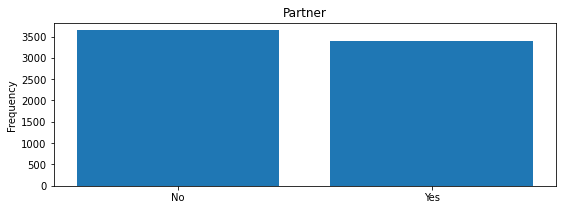

Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64


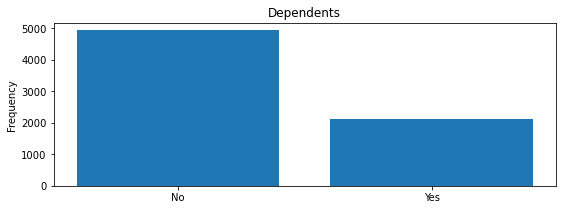

Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


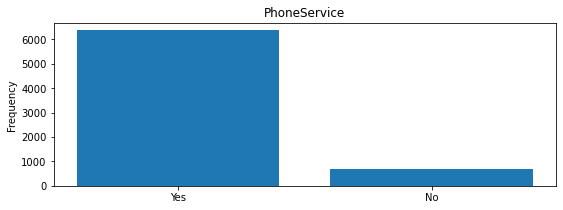

PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64


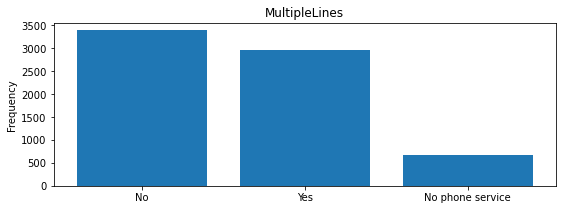

MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


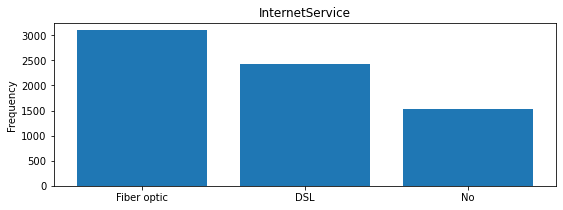

InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


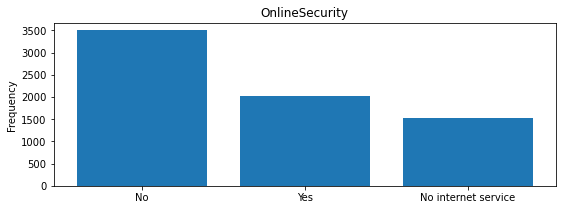

OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


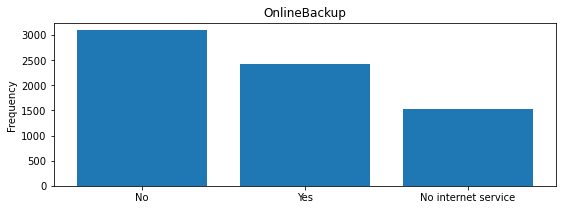

OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


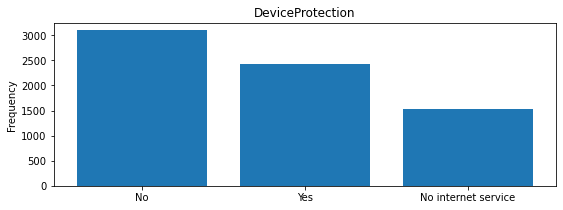

DeviceProtection:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


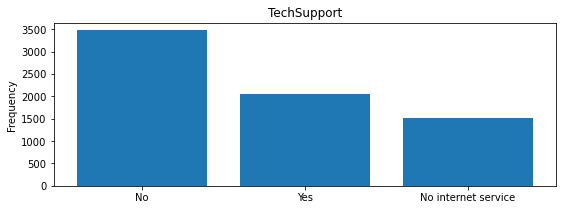

TechSupport:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


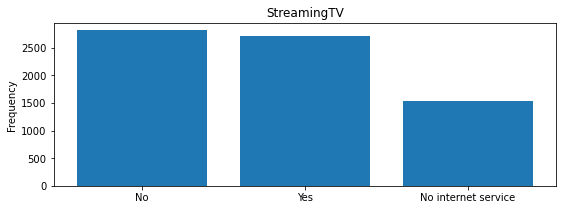

StreamingTV:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


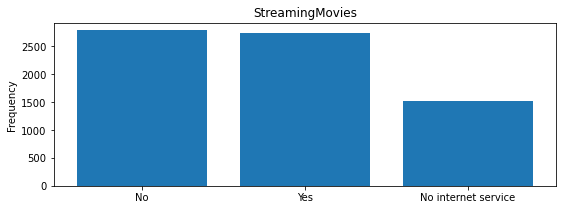

StreamingMovies:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


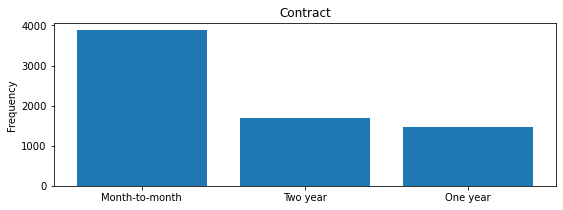

Contract:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


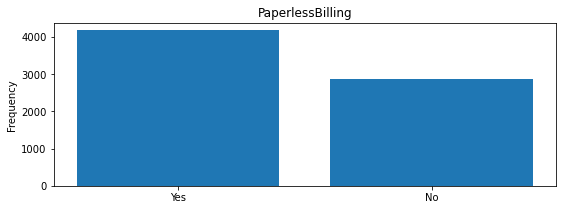

PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


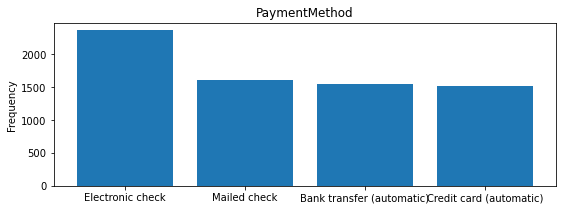

PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


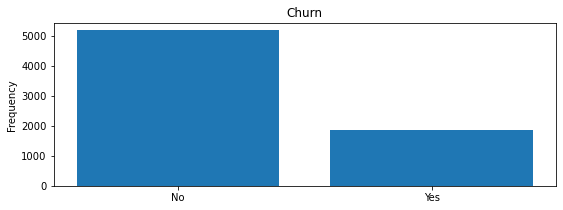

Churn:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [70]:
for c in categorical_list:
    bar_plot(c)


In [71]:
numerical_int64 = (data.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Numerical variables:")
print(numerical_int64_list)


Numerical variables:
['SeniorCitizen', 'tenure']


In [72]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

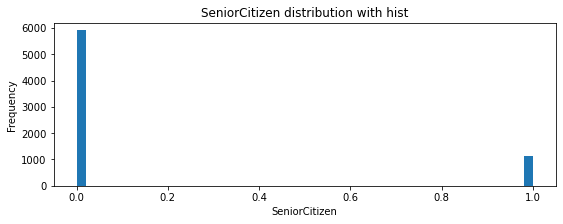

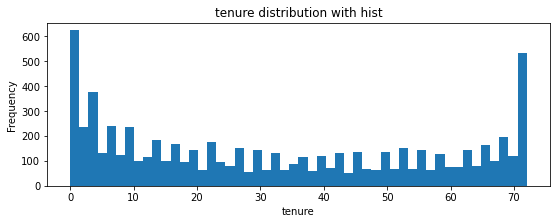

In [73]:
for n in numerical_int64_list:
    plot_hist(n)

In [74]:
numerical_float64 = (data.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['MonthlyCharges', 'TotalCharges']


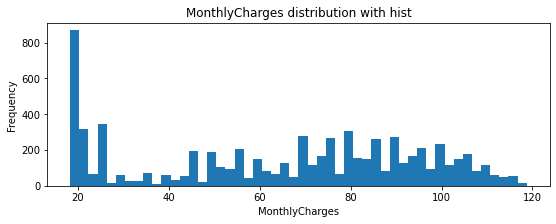

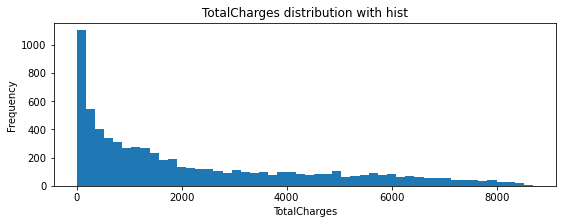

In [75]:
for n in numerical_float64_list:
    plot_hist(n)

HEATMAPS FOR CHECKING CORRELATIONS

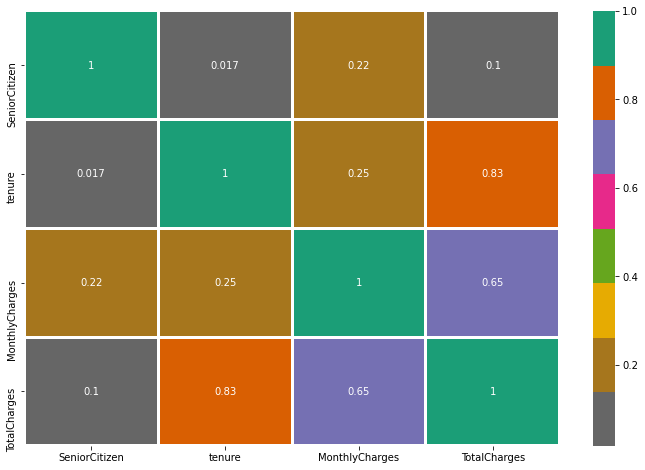

In [76]:
plt.figure(figsize=(12,8)) 
sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

IMPLICATION : There is a high correlation between 'tenure' and 'TotalCharges'.
                  
              Another notable correlation is between 'MonthlyCharges' and 'TotalCharges'

FEATURE ENGINEERING

In [77]:
def print_unique_col_value(data):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}:{data[column].unique()}')
   

In [78]:
print_unique_col_value(data)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [79]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [80]:
print_unique_col_value(data)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [81]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines',
                 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                 'StreamingTV','StreamingMovies','PaperlessBilling','Churn'] #all cloumn with yes and no

for col in yes_no_columns:
    data[col].replace({'Yes':1,'No':0},inplace=True)

In [82]:
for col in data:
    print(f'{col}:{data[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [83]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)
data['gender'].unique()

array([1, 0], dtype=int64)

In [84]:
data = pd.get_dummies(data=data,columns=['InternetService','Contract','PaymentMethod'])
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [85]:
data.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1069,0,1,0,0,20,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
5562,1,1,1,0,56,1,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
318,0,1,1,0,24,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4055,0,0,0,0,54,0,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0


In [86]:
data.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

DATA PREPROCESSING

In [87]:
#We will use min-max or normalization.
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
#Now our dataframe is scale and used for prediction
#We are done with preprocessing,
for col in data:
    print(f'{col}:{data[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Strea

In [88]:
columns = data.columns.drop('Churn')
features = columns
label = ['Churn']

X = data[features]
y = data[label]

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 7043
Total # of sample in train dataset: 5634
Total # of sample in validation dataset: 704
Total # of sample in test dataset: 705


MACHINE LEARNING MODELS

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

<ipython-input-90-1a83878fa1cc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn_model.fit(X_train,y_train)


KNN accuracy: 0.7560283687943262


In [94]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM accuracy is : 0.7773049645390071


In [95]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       511
           1       0.63      0.47      0.54       194

    accuracy                           0.78       705
   macro avg       0.72      0.68      0.70       705
weighted avg       0.76      0.78      0.77       705



In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

<ipython-input-96-dfe262aa5b25>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


0.7801418439716312


In [97]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       511
           1       0.63      0.48      0.55       194

    accuracy                           0.78       705
   macro avg       0.73      0.69      0.70       705
weighted avg       0.77      0.78      0.77       705



In [98]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Gradient Boosting Classifier 0.7645390070921986
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       511
           1       0.59      0.49      0.54       194

    accuracy                           0.76       705
   macro avg       0.70      0.68      0.69       705
weighted avg       0.75      0.76      0.76       705

